# Asana Guide

In [1]:
!sudo /bin/bash -c "(source /venv/bin/activate; pip install -- asana python-dateutil)"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 7.4 MB/s eta 0:00:00


In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import helpers.asana_utils as hasautil

In [87]:
ASANA_ACCESS_TOKEN = "*"

# List All Available Users (Convenience Function)

In [5]:
# Get list of all usernames in workspace.
usernames = hasautil.list_workspace_users(
    workspace_name="Causify.AI", access_token=ASANA_ACCESS_TOKEN
)

print(f"\nFound {len(usernames)} users:")
for idx, name in enumerate(usernames, 1):
    print(f"  {idx}. {name}")


Found 26 users:
  1. Bhaves Jeram
  2. Bradford Harries
  3. cathy.lopez@athena.com
  4. Chutian Ma
  5. Dan Yachmenev
  6. Danya Tikhomirov
  7. Denzel Andrei Fadol
  8. GP Saggese
  9. Grisha Pomazkin
  10. Heanh Sok
  11. Joel Sherlock
  12. kostas@causify.ai
  13. kostas@kaizen-tech.io
  14. Krishna Taduri
  15. Nina Lee
  16. Patrick Gatien
  17. Paul Smith
  18. Samarth KaPatel
  19. Shaunak Dhande
  20. Shayan Ghasemnezhad
  21. Sonya Nikiforova
  22. Tamara Jordania
  23. Tiffany Wilson
  24. Vedanshu Joshi
  25. Vielka Macalisang
  26. Vladimir Yakovenko


# Using the AsanaAnalytics Class Directly

In [6]:
# Create an instance of AsanaAnalytics.
analytics = hasautil.AsanaAnalytics(access_token=ASANA_ACCESS_TOKEN)
# Get workspace GID.
workspace_gid = analytics.get_workspace_gid(workspace_name="Causify.AI")
print(f"Workspace GID: {workspace_gid}")
# Get all team members.
team_members = analytics.get_team_members(workspace_gid)
print(f"\nTeam Members ({len(team_members)}):")
for member in team_members:
    print(f"  - {member['name']} ({member['email']}) [GID: {member['gid']}]")
# Get all usernames.
usernames_list = analytics.list_all_usernames(workspace_gid)
print(f"\nUsernames: {usernames_list}")

Workspace GID: 1204522243707972

Team Members (26):
  - Bhaves Jeram (N/A) [GID: 1206953703139495]
  - Bradford Harries (N/A) [GID: 1208471867406545]
  - cathy.lopez@athena.com (N/A) [GID: 1210754535118396]
  - Chutian Ma (N/A) [GID: 1211017376374459]
  - Dan Yachmenev (N/A) [GID: 1210884132535132]
  - Danya Tikhomirov (N/A) [GID: 1210884132616670]
  - Denzel Andrei Fadol (N/A) [GID: 1211066313265880]
  - GP Saggese (N/A) [GID: 1207503730765229]
  - Grisha Pomazkin (N/A) [GID: 1211024029854360]
  - Heanh Sok (N/A) [GID: 1210884132734027]
  - Joel Sherlock (N/A) [GID: 1209472218263347]
  - kostas@causify.ai (N/A) [GID: 1211592520251109]
  - kostas@kaizen-tech.io (N/A) [GID: 1211592873994358]
  - Krishna Taduri (N/A) [GID: 1210884319001409]
  - Nina Lee (N/A) [GID: 1211025689105055]
  - Patrick Gatien (N/A) [GID: 1211432529599386]
  - Paul Smith (N/A) [GID: 1208304533249037]
  - Samarth KaPatel (N/A) [GID: 1208383301585707]
  - Shaunak Dhande (N/A) [GID: 1208660351047937]
  - Shayan Ghas

# Find Specific Users

In [7]:
# Find a single user by name (exact or partial match).
user = analytics.get_user_by_name(workspace_gid, "Shaunak")
if user:
    print(f"Found user: {user['name']} (GID: {user['gid']})")
else:
    print("User not found")

# Find multiple users by names.
target_users = ["Shaunak Dhande", "Jane Smith", "GP Saggese", "Krishna Taduri"]
found_users = analytics.get_users_by_names(workspace_gid, target_users)
print(f"\nSearched for: {target_users}")
print(f"Found {len(found_users)} users:")
for user in found_users:
    print(f"  - {user['name']}")

Found user: Shaunak Dhande (GID: 1208660351047937)


User 'Jane Smith' not found in workspace



Searched for: ['Shaunak Dhande', 'Jane Smith', 'GP Saggese', 'Krishna Taduri']
Found 3 users:
  - Shaunak Dhande
  - GP Saggese
  - Krishna Taduri


# Get tasks created for a Specific User in specified time

In [15]:
# Define date range.
start_date = datetime.datetime(2025, 10, 1, tzinfo=datetime.timezone.utc)
end_date = datetime.datetime(2025, 10, 9, tzinfo=datetime.timezone.utc)

In [16]:
username = "Shaunak Dhande"
tasks = analytics.get_user_tasks(
    workspace_gid,
    # Can use username OR GID!
    user_identifier=username,
    start_date=start_date,
    end_date=end_date,
)
print(f"\nTasks for {username}:")
print(f"Total tasks in period: {len(tasks)}")
# Show first 3 tasks.
for idx, task in enumerate(tasks, 1):
    print(f"\n  Task {idx}:")
    print(f"    Name: {task.get('name', 'N/A')}")
    print(f"    Completed: {task.get('completed', False)}")
    print(f"    Created: {task.get('created_at', 'N/A')}")
print("\n✓ You can also use GID instead of username if preferred")


Tasks for Shaunak Dhande:
Total tasks in period: 8

  Task 1:
    Name: Compute stats about GitHub
    Completed: False
    Created: 2025-10-03T15:29:36.281Z

  Task 2:
    Name: Compute stats about Asana
    Completed: False
    Created: 2025-10-03T15:29:51.856Z

  Task 3:
    Name: Helpers doc rendering error for assets and styles
    Completed: True
    Created: 2025-10-08T15:48:43.608Z

  Task 4:
    Name: Publish newly added msml610
    Completed: False
    Created: 2025-10-08T15:49:44.697Z

  Task 5:
    Name: Git invitation automation and assistance
    Completed: True
    Created: 2025-10-01T18:48:06.636Z

  Task 6:
    Name: Send update
    Completed: False
    Created: 2025-10-06T14:04:42.934Z

  Task 7:
    Name: Write a md on how to publish on substack
    Completed: False
    Created: 2025-10-03T18:50:47.592Z

  Task 8:
    Name: Publish csfy to private scope
    Completed: False
    Created: 2025-10-02T17:01:39.237Z

✓ You can also use GID instead of username if preferre

# Calculate Statistics for a Single User (BY USERNAME!)

Comments (total_comments)

    - What it is: Only the actual comments that users write on tasks
    - Examples:
        - "This looks good, approved!"
        - "Can you update the deadline?"
        - "I've completed the design mockups"
    - Why it matters: Shows direct communication and collaboration on tasks

Activity (total_activity)

    - What it is: ALL events/actions on a task, including comments
    - Examples:
        - Comments (like above)
        - Task status changes ("marked complete", "reopened")
        - Assignee changes ("assigned to John")
        - Due date changes ("due date changed to Oct 15")
        - Attachments added
        - Custom field updates
        - Task moved to different section/project
        - Subtasks created
        - Followers added
        - Likes/hearts on the task
    - Why it matters: Shows overall engagement and how actively a task is being worked on

In [20]:
username = "Shaunak Dhande"

# Option A: Using months_back parameter with USERNAME.
stats_3m = analytics.calculate_user_stats(
    workspace_gid,
    user_identifier=username,  # Can use username OR GID!
    months_back=3,
)

print(f"\n3-Month Stats for {username}:")
print(f"  Period: {stats_3m['start_date']} to {stats_3m['end_date']}")
print(f"  Tasks Created: {stats_3m['tasks_created']}")
print(f"  Tasks Completed: {stats_3m['tasks_completed']}")
print(f"  Tasks In Progress: {stats_3m['tasks_in_progress']}")
print(f"  Completion Rate: {stats_3m['completion_rate']:.1f}%")
print(f"  Total Comments: {stats_3m['total_comments']}")
print(f"  Total Activity: {stats_3m['total_activity']}")
print(f"  Projects: {stats_3m['projects']}")


3-Month Stats for Shaunak Dhande:
  Period: 2025-07-10T22:23:42.265793+00:00 to 2025-10-08T22:23:42.265793+00:00
  Tasks Created: 88
  Tasks Completed: 69
  Tasks In Progress: 19
  Completion Rate: 78.4%
  Total Comments: 87
  Total Activity: 683
  Projects: ['Unknown']


In [23]:
# Option B: Using specific date range with USERNAME.
stats_custom = analytics.calculate_user_stats(
    workspace_gid,
    user_identifier=username,  # Username works here too!
    start_date=datetime.datetime(2025, 7, 1, tzinfo=datetime.timezone.utc),
    end_date=datetime.datetime(2025, 10, 9, tzinfo=datetime.timezone.utc),
)

print(f"\nCustom Date Range Stats for {username}:")
print(f"  Period: {stats_custom['period_label']}")
print(f"  Tasks Created: {stats_custom['tasks_created']}")
print(f"  Completion Rate: {stats_custom['completion_rate']:.1f}%")


Custom Date Range Stats for Shaunak Dhande:
  Period: 2025-07-01 to 2025-10-09
  Tasks Created: 88
  Completion Rate: 78.4%


In [24]:
# Option C: You can still use GID if you have it.
if team_members:
    user_gid = team_members[0]["gid"]
    stats_by_gid = analytics.calculate_user_stats(
        workspace_gid, user_identifier=user_gid, months_back=1
    )
    print(f"\n✓ Stats calculated using GID: {user_gid}")


✓ Stats calculated using GID: 1206953703139495


# Using Convenience Function with Username for stats

In [29]:
quick_stats = hasautil.get_user_stats(
    user_identifier="Shaunak Dhande",  # Username!
    workspace_gid=workspace_gid,
    months=3,
    access_token=ASANA_ACCESS_TOKEN,
)

print(f"Quick stats for Shaunak Dhande:")
print(f"  Completion Rate: {quick_stats['completion_rate']:.1f}%")
print(f"  Comments: {quick_stats['total_comments']}")

Quick stats for Shaunak Dhande:
  Completion Rate: 78.4%
  Comments: 87


# Generate Team Report (All Users, Multiple Time Periods)

In [28]:
# Using convenience function - analyze last 1, 3, and 12 months.
report_periods = hasautil.get_team_report(
    workspace_name="Causify.AI",
    time_periods=[1, 3],
    access_token=ASANA_ACCESS_TOKEN,
)

print(f"\nReport generated at: {report_periods['generated_at']}")
print(f"Analyzed {len(report_periods['team_members'])} team members")
print(f"Time periods: {report_periods['time_periods']} months")

# Display summary for each member.
for member_data in report_periods["team_members"]:
    member = member_data["user"]
    print(f"\n{member['name']}:")

    for period, stats in member_data["stats_by_period"].items():
        if "error" not in stats:
            print(f"  {period}:")
            print(
                f"    Created: {stats['tasks_created']}, "
                f"Completed: {stats['tasks_completed']}, "
                f"Rate: {stats['completion_rate']:.1f}%"
            )


Report generated at: 2025-10-08T22:31:32.136604
Analyzed 25 team members
Time periods: [1, 3] months

Bhaves Jeram:
  1_month:
    Created: 2, Completed: 0, Rate: 0.0%
  3_month:
    Created: 10, Completed: 4, Rate: 40.0%

Bradford Harries:
  1_month:
    Created: 2, Completed: 0, Rate: 0.0%
  3_month:
    Created: 6, Completed: 3, Rate: 50.0%

cathy.lopez@athena.com:
  1_month:
    Created: 0, Completed: 0, Rate: 0.0%
  3_month:
    Created: 0, Completed: 0, Rate: 0.0%

Chutian Ma:
  1_month:
    Created: 26, Completed: 15, Rate: 57.7%
  3_month:
    Created: 31, Completed: 20, Rate: 64.5%

Dan Yachmenev:
  1_month:
    Created: 2, Completed: 2, Rate: 100.0%
  3_month:
    Created: 6, Completed: 6, Rate: 100.0%

Danya Tikhomirov:
  1_month:
    Created: 10, Completed: 5, Rate: 50.0%
  3_month:
    Created: 12, Completed: 6, Rate: 50.0%

Denzel Andrei Fadol:
  1_month:
    Created: 57, Completed: 56, Rate: 98.2%
  3_month:
    Created: 136, Completed: 133, Rate: 97.8%

GP Saggese:
  1

# Generate Team Report (Specific Date Range)

In [58]:
# Using convenience function - analyze specific date range.
start = datetime.datetime(2025, 9, 12)
end = datetime.datetime(2025, 10, 9)

report_daterange = hasautil.get_team_report(
    workspace_name="Causify.AI",
    start_date=start,
    end_date=end,
    access_token=ASANA_ACCESS_TOKEN,
)

print(f"\nDate range: {report_daterange['date_range']}")
print(f"Analyzed {len(report_daterange['team_members'])} team members")


Date range: {'start': '2025-09-12T00:00:00', 'end': '2025-10-09T00:00:00'}
Analyzed 25 team members


# Generate Team Report (Specific Users Only)

In [35]:
# Generate report for only specific team members.
report_specific = hasautil.get_team_report(
    workspace_name="Causify.AI",
    start_date=start,
    end_date=end,
    usernames=["GP Saggese", "Chutian Ma"],
    access_token=ASANA_ACCESS_TOKEN,
)
print(f"Analyzed {len(report_specific['team_members'])} specific users")
for member_data in report_specific["team_members"]:
    member = member_data["user"]
    stats_key = list(member_data["stats_by_period"].keys())[0]
    stats = member_data["stats_by_period"][stats_key]
    if "error" not in stats:
        print(f"\n{member['name']}:")
        print(
            f"  Tasks: {stats['tasks_created']} created, "
            f"{stats['tasks_completed']} completed"
        )
        print(f"  Completion Rate: {stats['completion_rate']:.1f}%")

Analyzed 2 specific users

GP Saggese:
  Tasks: 74 created, 15 completed
  Completion Rate: 20.3%

Chutian Ma:
  Tasks: 13 created, 3 completed
  Completion Rate: 23.1%


# Using Class Methods to Generate Report

In [84]:
# Create analytics instance.
analytics = hasautil.AsanaAnalytics(access_token=ASANA_ACCESS_TOKEN)
# Get workspace.
workspace_gid = analytics.get_workspace_gid("Causify.AI")
# Generate report using class method.
report_class = analytics.generate_team_report(
    workspace_gid, start_date=start, end_date=end, usernames=["Shaunak Dhande"]
)
print("Report generated using class methods!")

Report generated using class methods!


# Convert Report to Pandas DataFrame

In [60]:
members_data = []

for member_data in report_daterange["team_members"]:
    member = member_data["user"]
    stats_key = list(member_data["stats_by_period"].keys())[0]
    stats = member_data["stats_by_period"][stats_key]

    if "error" not in stats:
        members_data.append(
            {
                "Name": member["name"],
                "Email": member["email"],
                "Period": stats_key,
                "Tasks Created": stats["tasks_created"],
                "Tasks Completed": stats["tasks_completed"],
                "Tasks In Progress": stats["tasks_in_progress"],
                "Completion Rate (%)": round(stats["completion_rate"], 1),
                "Total Comments": stats["total_comments"],
                "Total Activity": stats["total_activity"],
                "Projects": ", ".join(stats["projects"][:3]),  # First 3 projects
            }
        )

df = pd.DataFrame(members_data)
print("\nTeam Performance DataFrame:")
print(df.head())

# Save to CSV.
# df.to_csv('asana_team_report.csv', index=False)
# print("\n✓ Saved to asana_team_report.csv")


Team Performance DataFrame:
                     Name Email                    Period  Tasks Created  \
0            Bhaves Jeram   N/A  2025-09-12 to 2025-10-09              2   
1        Bradford Harries   N/A  2025-09-12 to 2025-10-09              2   
2  cathy.lopez@athena.com   N/A  2025-09-12 to 2025-10-09              0   
3              Chutian Ma   N/A  2025-09-12 to 2025-10-09             18   
4           Dan Yachmenev   N/A  2025-09-12 to 2025-10-09              2   

   Tasks Completed  Tasks In Progress  Completion Rate (%)  Total Comments  \
0                0                  2                  0.0              10   
1                0                  2                  0.0               0   
2                0                  0                  0.0               0   
3                9                  9                 50.0              10   
4                2                  0                100.0               0   

   Total Activity                            

In [61]:
df["Projects"].unique

<bound method Series.unique of 0                                 TechNow - Sprint (GP)
1                            GP: Agendas, Personal List
2                                                      
3           Causify Sentinel, Tech Data Science Sprints
4                                                      
5     Causify Sentinel, Causify Grid, Tech Data Scie...
6     Causify.AI - Hiring Pipeline, Thought Leadersh...
7     TechNow - Security and Compliance (Shayan), Ca...
8     Causify Horizon, Tech Data Science Sprints, Me...
9     TechNow - Security and Compliance (Shayan), Te...
10    Causify.AI - Hiring Pipeline, TechNow - Suppor...
11                                                     
12    TechNow - Generalize KaizenFlow (Krishna), Cau...
13    Tech Data Science Sprints, Causify Horizon, Me...
14                                                     
15            TechNow - Blog and marketing Q3 (Shaunak)
16    Causify Grid, Tech Data Science Sprints, Metri...
17    Causify.AI 

# Visualization - Completion Rates Bar Chart

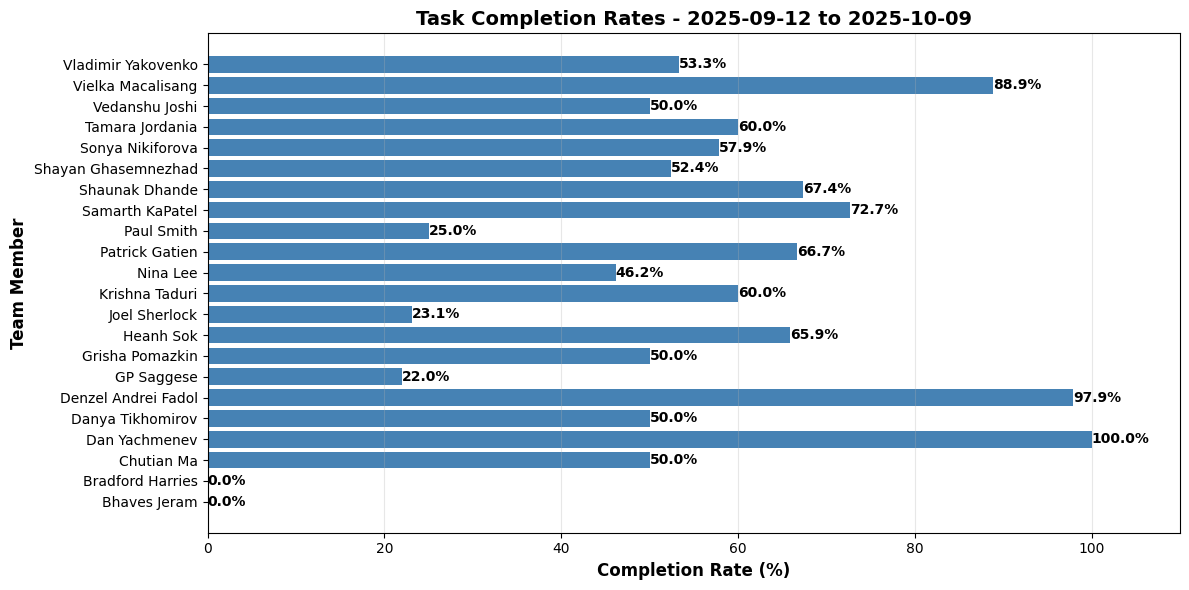

Completion rates chart created


In [62]:
fig1 = hasautil.plot_completion_rates(
    report_daterange,
    figsize=(12, 6),
    # save_path='charts/completion_rates.png'  # Optional: save to file
)
plt.show()

print("Completion rates chart created")

# Visualization - Task Metrics (Created/Completed/In Progress)

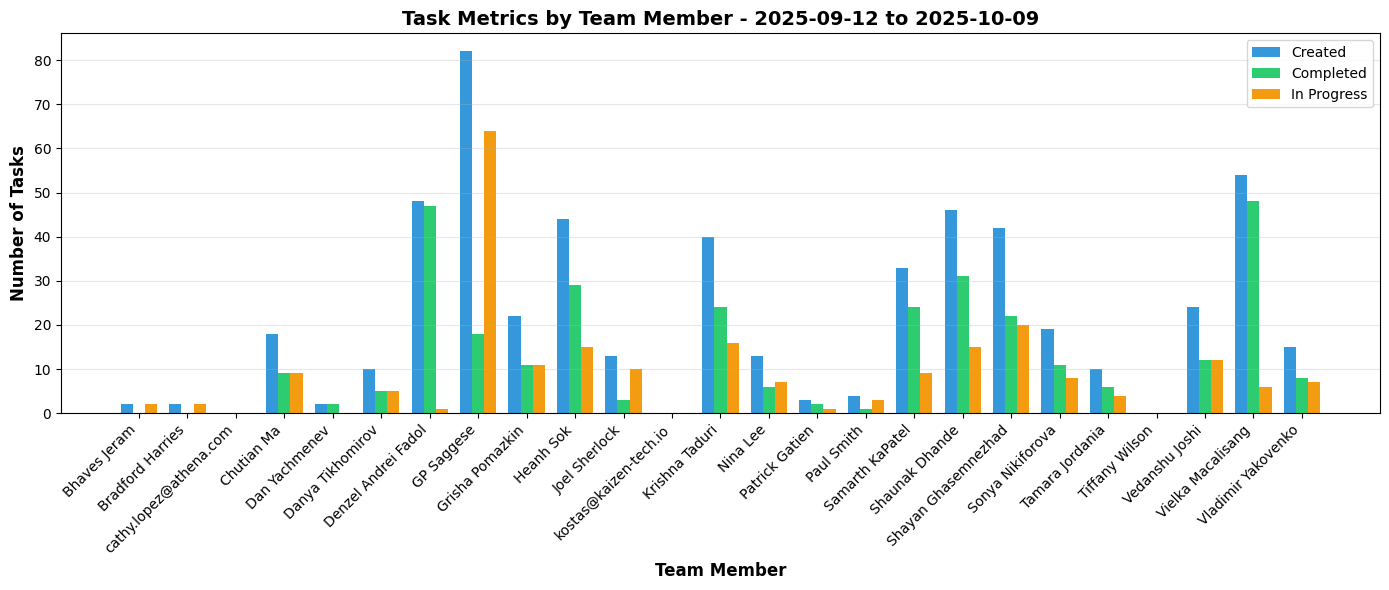

Task metrics chart created


In [63]:
fig2 = hasautil.plot_task_metrics(
    report_daterange,
    figsize=(14, 6),
    # save_path='charts/task_metrics.png'
)
plt.show()

print("Task metrics chart created")

# Visualization - Activity Metrics (Comments & Activity)

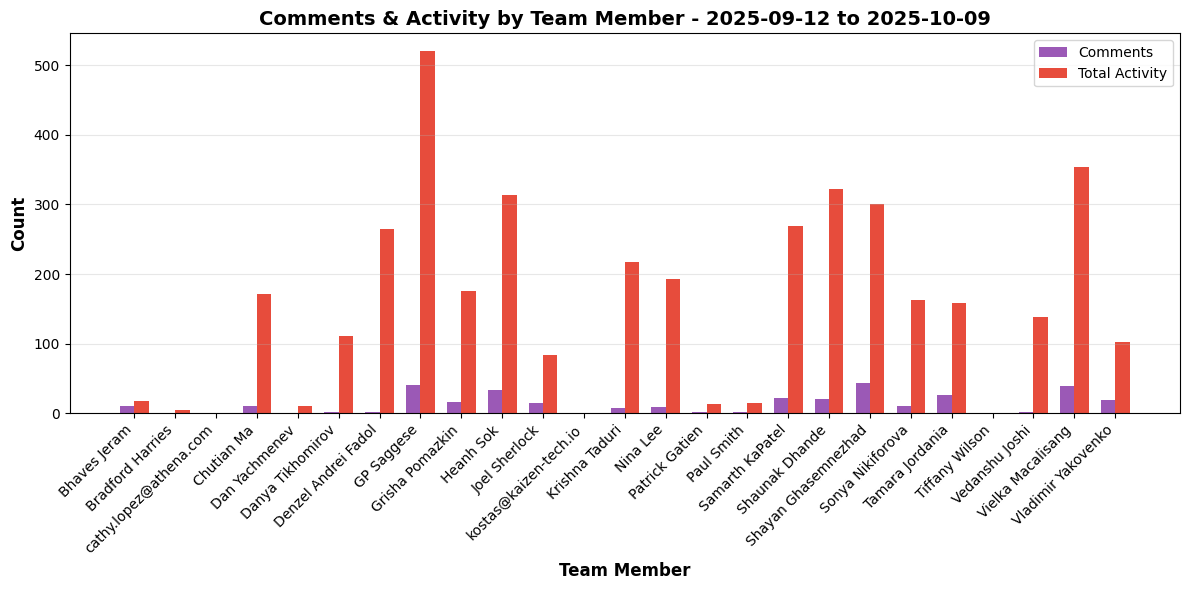

Activity metrics chart created


In [65]:
fig3 = hasautil.plot_activity_metrics(
    report_daterange,
    figsize=(12, 6),
    # save_path='charts/activity_metrics.png'
)
plt.show()

print("Activity metrics chart created")

# Visualization - Complete Dashboard (All Metrics)

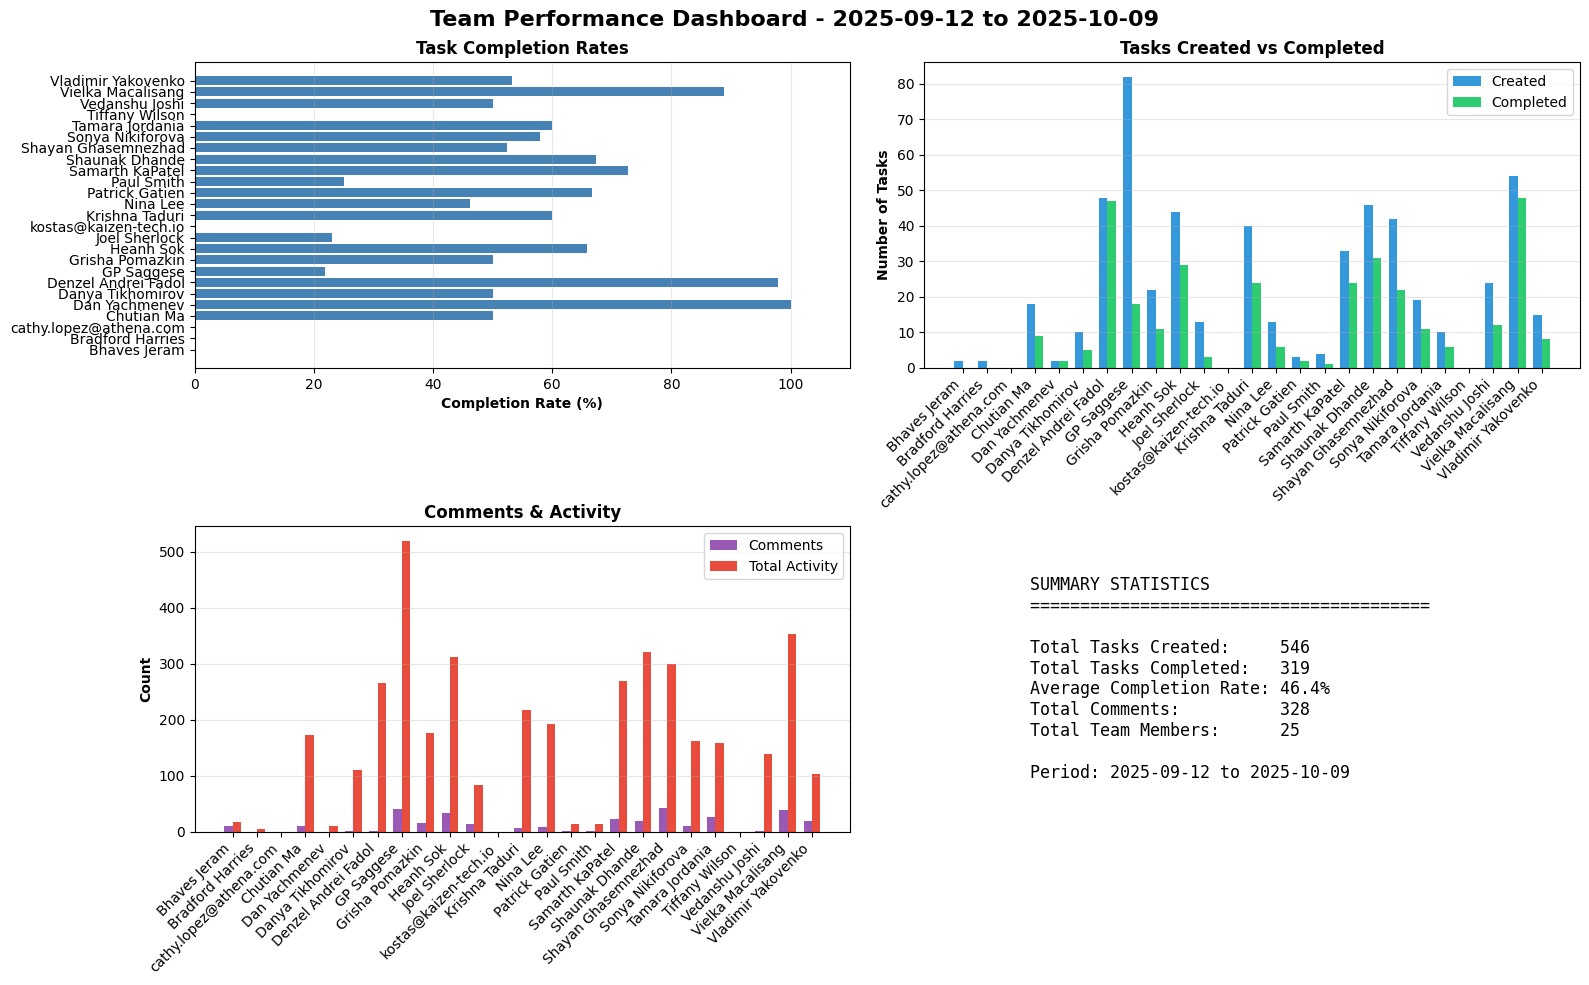

Dashboard created with 4 panels showing all metrics


In [67]:
fig4 = hasautil.create_summary_dashboard(
    report_daterange,
    figsize=(16, 10),
    # save_path='charts/dashboard.png'
)
plt.show()

print("Dashboard created with 4 panels showing all metrics")

# Visualization for Specific Time Period

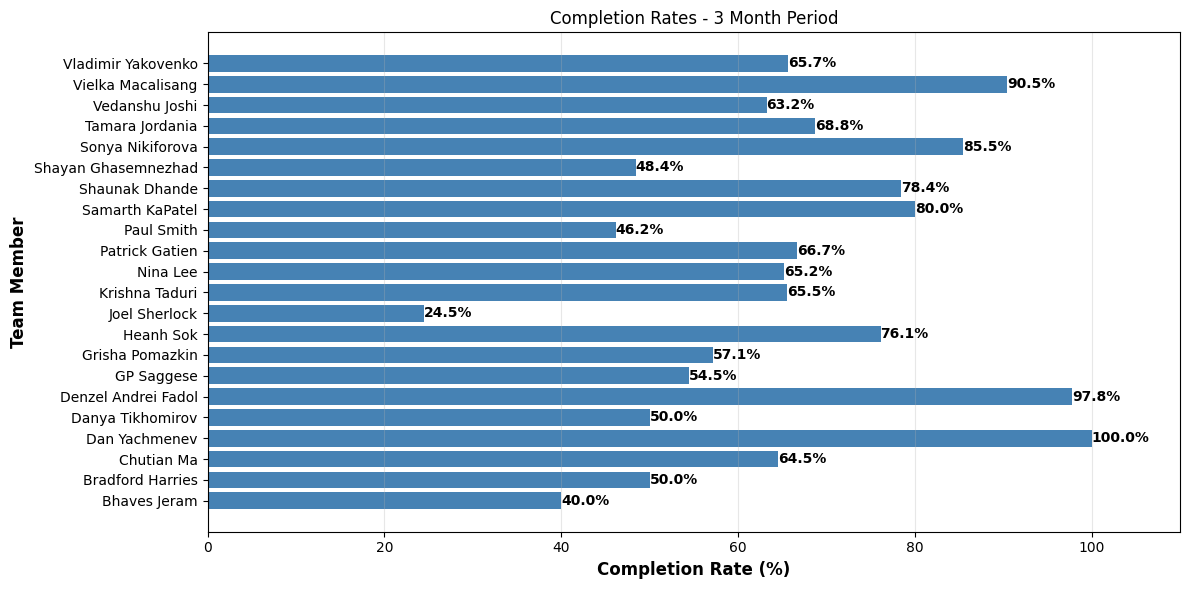

Created chart for 3-month period


In [69]:
# If you have multiple time periods, specify which one to visualize.
if "time_periods" in report_periods:
    # Visualize 3-month period specifically.
    fig5 = hasautil.plot_completion_rates(
        report_periods, period_key="3_month", figsize=(12, 6)
    )
    plt.title("Completion Rates - 3 Month Period")
    plt.show()

    print("Created chart for 3-month period")

# Compare Multiple Time Periods


Creating charts for 1-month period...


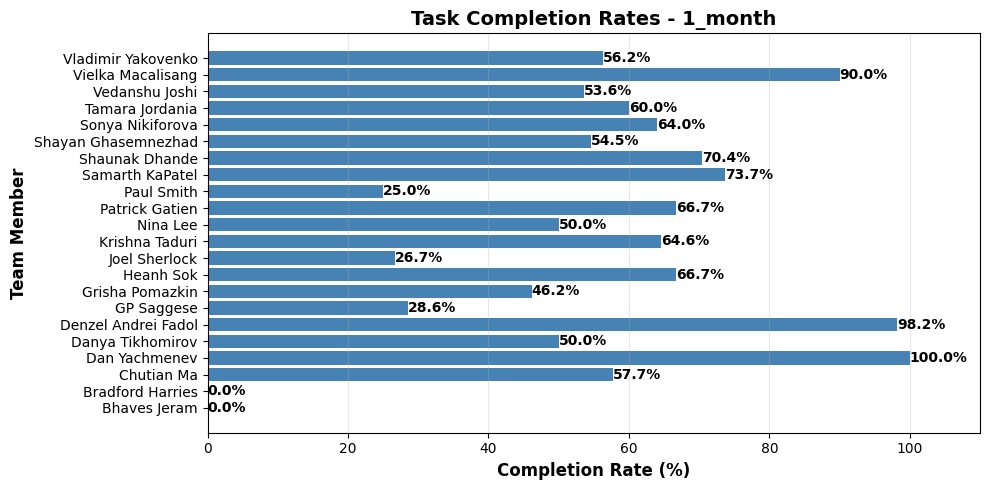


Creating charts for 3-month period...


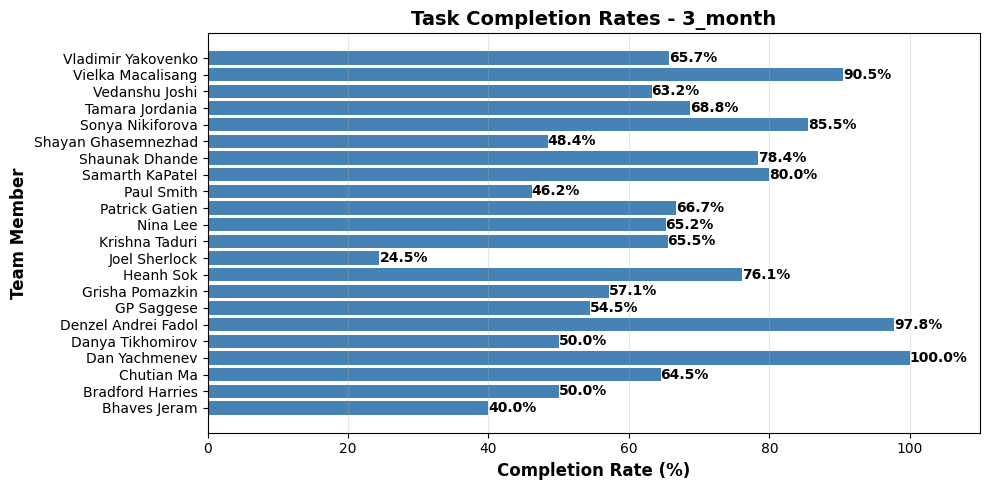

In [70]:
# Create comparison for each time period.
if "time_periods" in report_periods:
    for period in report_periods["time_periods"]:
        period_key = f"{period}_month"
        print(f"\nCreating charts for {period}-month period...")

        fig = hasautil.plot_completion_rates(
            report_periods, period_key=period_key, figsize=(10, 5)
        )
        plt.show()

# Advanced - Get Project Completion Percentage

In [85]:
# You need a project GID for this (get from Asana URL).
# Example: https://app.asana.com/0/1234567890/list
# Project GID is 1234567890

# Uncomment and use your actual project GID:
project_gid = "1211138327783762"

project_stats = analytics.get_project_completion_percentage(
    project_gid=project_gid
)

print(f"Project: {project_stats['project_name']}")
print(f"Project: {project_gid}")
print(f"Total Tasks: {project_stats['total_tasks']}")
print(f"Completed: {project_stats['completed_tasks']}")
print(f"In Progress: {project_stats['in_progress_tasks']}")
print(f"Completion: {project_stats['completion_percentage']:.1f}%")

Project: TechNow - Sprint (GP)
Project: 1211138327783762
Total Tasks: 374
Completed: 256
In Progress: 118
Completion: 68.4%


In [74]:
import json

# Save full report to JSON file.
with open("asana_team_report.json", "w") as f:
    json.dump(report_daterange, f, indent=2)

print("✓ Report saved to asana_team_report.json")

✓ Report saved to asana_team_report.json


# Quick Usage Examples Summary

In [75]:
summary = """
CONVENIENCE FUNCTIONS (Easiest to use):
----------------------------------------
1. asautil.list_workspace_users(workspace_name, access_token)
   → Get list of all usernames

2. asautil.get_team_report(workspace_name, time_periods, access_token)
   → Generate report for all users, multiple time periods

3. asautil.get_team_report(workspace_name, start_date, end_date, access_token)
   → Generate report for specific date range

4. asautil.get_team_report(..., usernames=["John", "Jane"])
   → Generate report for specific users only

5. asautil.plot_completion_rates(report)
   → Create completion rates bar chart

6. asautil.plot_task_metrics(report)
   → Create task metrics grouped bar chart

7. asautil.plot_activity_metrics(report)
   → Create comments & activity chart

8. asautil.create_summary_dashboard(report)
   → Create comprehensive 4-panel dashboard


CLASS METHODS (More control):
------------------------------
analytics = asautil.AsanaAnalytics(access_token)

1. analytics.get_workspace_gid(workspace_name)
2. analytics.get_team_members(workspace_gid)
3. analytics.list_all_usernames(workspace_gid)
4. analytics.get_user_by_name(workspace_gid, username)
5. analytics.get_users_by_names(workspace_gid, usernames_list)
6. analytics.get_user_tasks(workspace_gid, user_gid, start_date, end_date)
7. analytics.calculate_user_stats(workspace_gid, user_gid, months_back)
8. analytics.generate_team_report(workspace_gid, time_periods, start_date, end_date)
9. analytics.get_project_completion_percentage(project_gid)
"""